In [1]:
from dipole_inverse_tools import set_max_num_threads
import numpy as np
from pathlib import Path
import time
import matplotlib.pyplot as plt
set_max_num_threads(4)
import dipole_inverse as dpinv  # noqa: E402

In [96]:

# location and name of QDM and cuboid file
QDMfile = './artificial_sample_Bzgrid.txt'
cuboidfile = './artificial_sample_cuboids.txt'

# size of QDM domain
QDM_domain = np.array([[0, 0], [40., 40.]]) * 1e-6
# Spacing between two QDM sample points
QDM_spacing = 2e-6
# half length of QDM sensor
QDM_deltax = 1e-6
# half width of QDM sensor
QDM_deltay = 1e-6
# area of QDM sensor -> necessary? --> use deltax * deltay
QDM_area = 4e-12
# thickness of sample -> Unnecessary
sample_height = 30e-6
# distance between QDM and top sample
scan_height = 2e-6
# file to write magnetization grains to
Magfile = 'test_artificial_sample_MAG.txt'

ssm_inversion = dpinv.Dipole(QDMfile, cuboidfile, QDM_domain, QDM_spacing,
                             QDM_deltax, QDM_deltay, QDM_area, sample_height,
                             scan_height)

In [97]:
QDM_domain

array([[0.e+00, 0.e+00],
       [4.e-05, 4.e-05]])

In [98]:
t = time.time()
ssm_inversion.read_files()
# ssm_inversion.cuboids[0][2] = 7e-6
ssm_inversion.prepare_matrix(method='numba', verbose=True)
t = time.time() - t
print(f'Populating matrix took {t} s')

Particle = 4 Cuboid = 0
Populating matrix took 0.004312276840209961 s


In [99]:
ssm_inversion.calculate_inverse(method='scipy_pinv2', 
                                rcond=1e-30
                                )

Start inversion with 441 knowns and 3 unknowns
Inversion has been carried out


In [100]:
ssm_inversion.Mag.reshape(-1, 3)

array([[7.98605129e-08, 6.03622008e+04, 2.25426788e-08]])

In [101]:
60508 / 4.8e5

0.12605833333333333

In [102]:
np.linalg.norm(ssm_inversion.Mag.reshape(-1, 3), axis=1)

array([60362.20077115])

In [103]:
dpinv.plot_tools.set_grain_geometries(ssm_inversion, spatial_scaling=1e6)

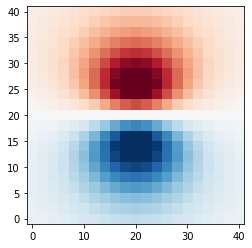

In [104]:
f, ax = plt.subplots()
im = dpinv.plot_tools.plot_scan_field(ssm_inversion, ax, 
                                      imshow_args={'cmap': 'RdBu_r',
                                                   'vmin': -20e-6 * 4e-12,
                                                   'vmax': 20e-6 * 4e-12})

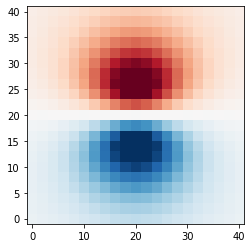

In [105]:
f, ax = plt.subplots()
im = dpinv.plot_tools.plot_inversion_field(ssm_inversion, ax, 
                                           imshow_args={'cmap': 'RdBu_r',
                                                   'vmin': -20e-6 * 4e-12,
                                                   'vmax': 20e-6 * 4e-12})

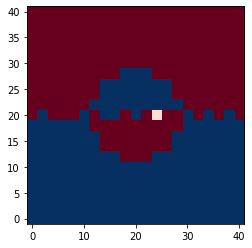

In [106]:
f, ax = plt.subplots()
im = dpinv.plot_tools.plot_residual(ssm_inversion, ax, 
                                    imshow_args={'cmap': 'RdBu_r',
                                                   'vmin': -20e-6 * 4e-12,
                                                   'vmax': 20e-6 * 4e-12})